In [23]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.express as px


## Functions for product details

In [24]:
# Function to get individual product
def get_product(soup):

    try:
        # Outer Tag Object
        title = soup.find("h1", attrs={"itemprop":"name"})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string


#Function to get discounterd / current price
def get_current_price(soup):

    try:
        price = soup.find("span", attrs={'class':'price-sales'}).string.strip()
    except AttributeError:
        price = ""

    return price


#Function to get standard
def get_standard_price(soup):

    try:
        standard_price = soup.find("span", attrs={'class':'price-standard'}).string.strip()
    except AttributeError:
        standard_price = ""

    return standard_price


def calculate_discount(source, standard_price, current_price):

    try:

        standard_price=  ''.join(char for char in standard_price if char.isdigit() or char == '.')
        current_price = ''.join(char for char in current_price if char.isdigit() or char == '.')

        standard_price_float = float(standard_price)
        current_price_float = float(current_price)

        discount = standard_price_float - current_price_float


    except ZeroDivisionError:
        discount = 0

    return discount

def get_product_url(soup):

    try:
        product_link = soup.find("link", attrs={'rel':'canonical'})['href']
    except AttributeError:
        product_link = ""

    return product_link

    

## Scraping the data from the website

In [25]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({   'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5)'
                    'AppleWebKit/537.36 (KHTML, like Gecko)'
                    'Chrome/50.0.2661.102 Safari/537.36'})

    # The webpage URL
    URL = "https://www.uniqlo.com/eu/en/men/featured/limited-offers"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'productTile__link js-productLink'})

    # Store the links
    links_list = []

    # Loop for extracting links from products
    for link in links:
            links_list.append(link.get('href'))

  
    d = {"product":[], "current_sale_price":[], "standard_price":[],"discount":[], "product_url":[]}
    

# Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.uniqlo.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

# # Function calls to display all product information
        d['product'].append(get_product(new_soup))
        d['current_sale_price'].append(get_current_price(new_soup))
        d['standard_price'].append(get_standard_price(new_soup))
        d['discount'].append(calculate_discount(new_soup, get_current_price(new_soup), get_standard_price(new_soup)))
        d['product_url'].append(get_product_url(new_soup))


    uniqlo_df = pd.DataFrame.from_dict(d)
    #convert to csv
    # uniqlo_df.to_csv('uniqlo.csv',header=True, index=False)
    




# Show all products

In [26]:
uniqlo_df

,product,current_sale_price,standard_price,discount,product_url
0,Cotton Linen Overshirt,39.90 €,59.90 €,-20.0,https://www.uniqlo.com/eu/en/product/cotton-li...
1,Attack On Titan UT Graphic T-Shirt,5.90 €,19.90 €,-14.0,https://www.uniqlo.com/eu/en/product/attack-on...
2,Slim Fit Chinos,39.90 €,39.90 €,0.0,https://www.uniqlo.com/eu/en/product/slim-fit-...
3,DRY Piqué Polo Shirt,9.90 €,24.90 €,-15.0,https://www.uniqlo.com/eu/en/product/dry-piqu%...
4,Attack On Titan UT Graphic T-Shirt,5.90 €,19.90 €,-14.0,https://www.uniqlo.com/eu/en/product/attack-on...
5,Keith Haring UT Round Mini Shoulder Bag,9.90 €,14.90 €,-5.0,https://www.uniqlo.com/eu/en/product/keith-har...
6,Uniqlo U AIRism Cotton Striped Oversized Crew ...,12.90 €,19.90 €,-7.0,https://www.uniqlo.com/eu/en/product/uniqlo-u-...
7,Sweat Pullover Hoodie,49.90 €,49.90 €,0.0,https://www.uniqlo.com/eu/en/product/sweat-pul...
8,Attack On Titan UT Graphic T-Shirt,5.90 €,19.90 €,-14.0,https://www.uniqlo.com/eu/en/product/attack-on...
9,AirSense Ultra Light Pleated Trousers (Adam Sc...,29.90 €,49.90 €,-20.0,https://www.uniqlo.com/eu/en/product/airsense-...


# Data Visualizations


Text(0.5, 1.0, 'Countplot of discounted prices')

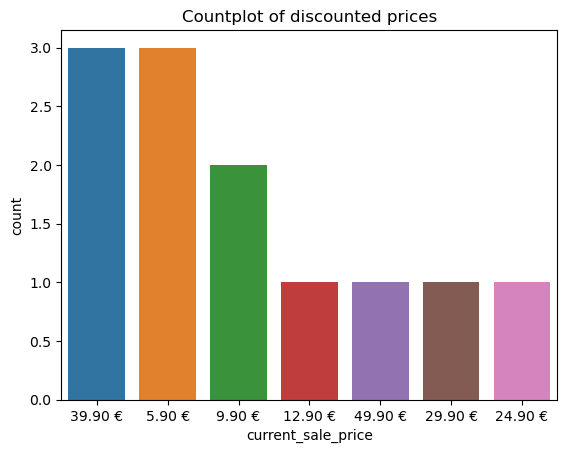

In [63]:
dataset = pd.read_csv('uniqlo.csv')
sns.countplot(data=dataset, x="current_sale_price")
plt.title('Countplot of discounted prices')


<AxesSubplot:xlabel='discount'>

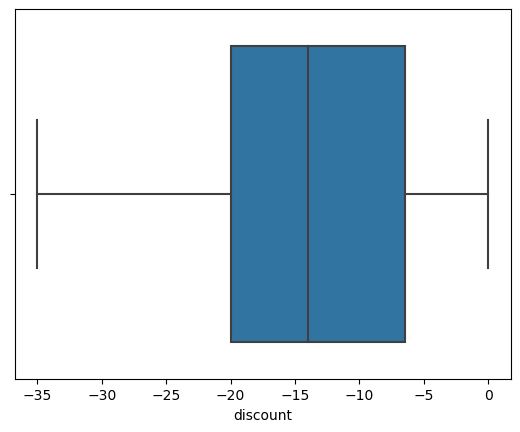

In [66]:
sns.boxplot(x=dataset["discount"])
